##**Var model**
- Un modelo de Vector Auto-Regresivo (VAR) es un tipo de modelo estadístico utilizado para analizar la relación entre dos o más variables de tiempo, donde cada variable depende no solo de su propia historia, sino también de la historia de las otras variables en el sistema. El modelo VAR se basa en la idea de que cualquier variable en el sistema puede ser expresada como una función lineal de sus valores pasados, así como de los valores pasados de las otras variables en el sistema.
- Vector Autoregression (VAR) is a statistical model that is used to analyze the relationship between multiple time series variables. The model assumes that each variable is a function of the past values of all variables in the system.

Mathematically, the VAR model can be written as:

Y_t = A_1Y_t-1 + A_2Y_t-2 + ... + A_p*Y_t-p + e_t

where Y_t is a K-dimensional vector of endogenous variables at time t, A_1, A_2, ..., A_p are KxK coefficient matrices for lags 1 to p, and e_t is a K-dimensional vector of error terms at time t.

The VAR model estimates the coefficients A_1, A_2, ..., A_p using a maximum likelihood method. Once the model is estimated, it can be used to generate forecasts for each variable in the system based on its past values and the past values of all other variables in the system.
- Future values are a lineal cmbination of past ones, simmilar to MovingAverage
-


In [ ]:
pip install yfinance

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
tickers = ['AAPL', 'GOOG', 'AMZN'] # Seleccionar los tickers de las empresas a analizar
start_date = '2023-01-01' # Definir la fecha de inicio para los datos
end_date = '2023-04-19' # Definir la fecha de fin para los datos
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

In [83]:
returns = np.log(data/data.shift(1)).dropna()
print(returns.shape)

# Fit a VAR model and select the optimal lag order / maxlags!
lags=15
model = sm.tsa.VAR(returns)
lag_order = model.select_order(maxlags=lags)
optimal_order = lag_order.aic

# Fit the VAR model with the optimal lag order
results = model.fit(optimal_order)

# Generate a forecast
forecast = results.forecast(returns.values[-optimal_order:], 10)
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=returns.index[-1], periods=10, freq='B'), columns=returns.columns)

(72, 3)


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


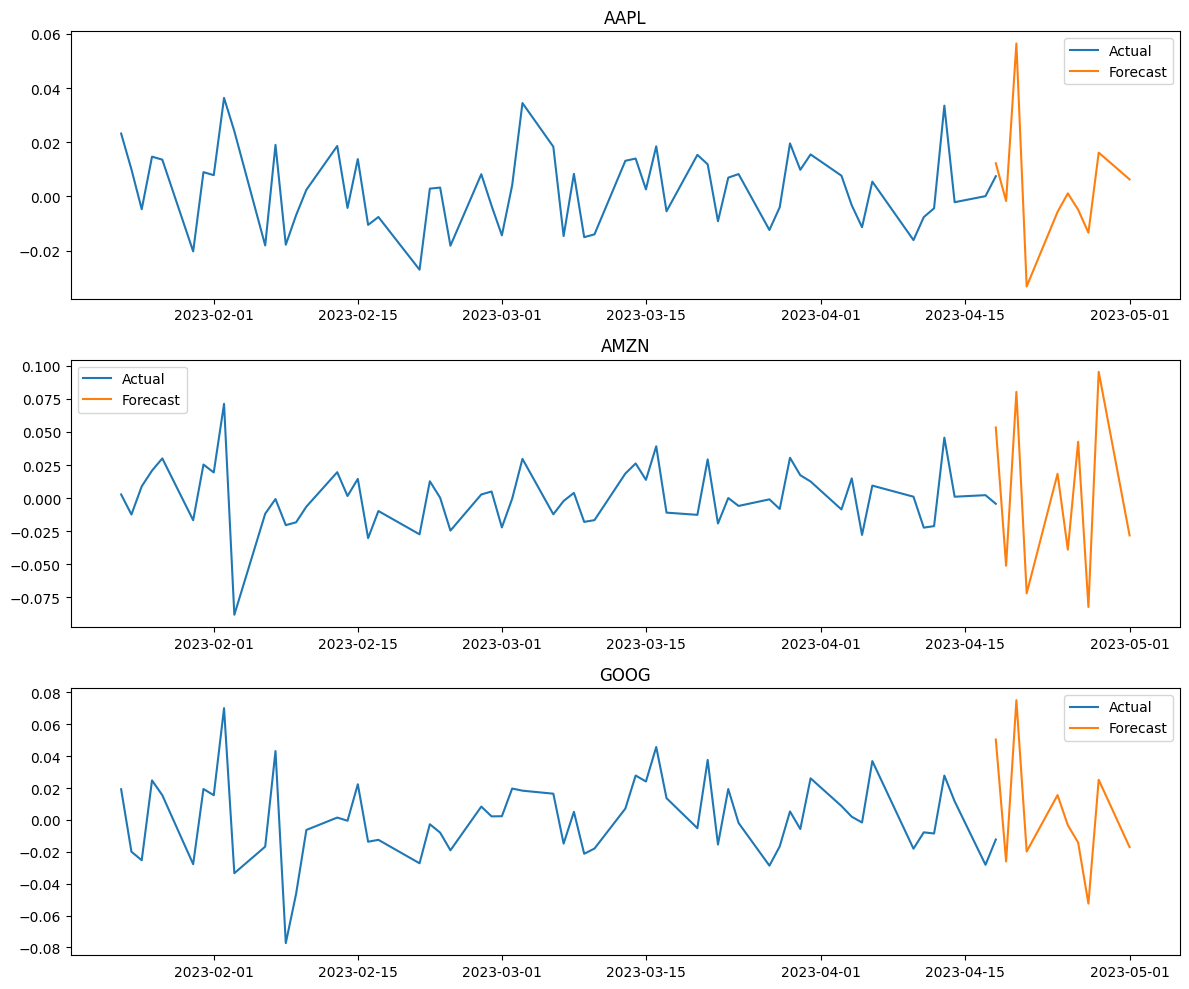

In [84]:
fig, axes = plt.subplots(nrows=len(returns.columns), ncols=1, figsize=(12,10))
for i, column in enumerate(returns.columns):
    ax = axes[i]
    ax.plot(returns.index[-60:], returns[column].tail(60))
    ax.plot(forecast_df.index, forecast_df[column])
    ax.set_title(column)
    ax.legend(['Actual', 'Forecast'])
plt.tight_layout()
plt.show()

##**Conclusiones**
- Se descargan los datos de los precios ajustados de cierre de las acciones de Apple (AAPL), Google (GOOG) y Amazon (AMZN) desde el 1 de enero de 2010 hasta el 19 de abril de 2023 utilizando la librería yfinance. Luego, se calculan los rendimientos logarítmicos diarios de los precios y se utiliza el modelo VAR para hacer predicciones de los rendimientos para los próximos 10 días. Finalmente, se grafican las predicciones junto con los precios reales para cada una de las empresas.

*Disclaimer: The information contained in this analysis is provided for general informational purposes only and should not be construed as investment adviceto operate on any financial product. The author is not liable for any losses or damages that may arise from the use of this information.*